In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

### 当我们拿到一批原始的数据

1、首先要明确有多少特征，哪些是连续的，哪些是类别的。

2、检查有没有缺失值，对确实的特征选择恰当方式进行弥补，使数据完整。

3、对连续的数值型特征进行标准化，使得均值为0，方差为1。

4、对类别型的特征进行one-hot编码。

5、将需要转换成类别型数据的连续型数据进行二值化。

6、为防止过拟合或者其他原因，选择是否要将数据进行正则化。

7、在对数据进行初探之后发现效果不佳，可以尝试使用多项式方法，寻找非线性的关系。

In [2]:
data = pd.read_csv("data.csv",engine = 'python')
data

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,518072,20180507121233054000000388275132,卡号1,0.02,0.98,2000,7.59,1.00,0.733,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,1205125,20180507121931540000000388298915,卡号1,0.02,0.98,0,23.67,0.94,0.087,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,18,1129897,20180507124659235000000023105807,卡号1,0.02,0.98,0,0.25,0.88,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,2599411,20180507115855621000000388224458,卡号1,0.03,0.65,0,0.31,0.76,0.472,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,1413051,20180504155156296000000021138084,卡号1,0.01,0.99,500,0.80,1.00,0.088,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


In [3]:
y_data = data['status']
data.drop(['status'],axis = 1,inplace = True)
data

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,15,518072,20180507121233054000000388275132,卡号1,0.02,0.98,2000,7.59,1.00,0.733,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,16,1205125,20180507121931540000000388298915,卡号1,0.02,0.98,0,23.67,0.94,0.087,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
7,18,1129897,20180507124659235000000023105807,卡号1,0.02,0.98,0,0.25,0.88,0.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,2599411,20180507115855621000000388224458,卡号1,0.03,0.65,0,0.31,0.76,0.472,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,26,1413051,20180504155156296000000021138084,卡号1,0.01,0.99,500,0.80,1.00,0.088,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0


## 1、数据类型的分析

In [4]:
data.dtypes

Unnamed: 0                                 int64
custid                                     int64
trade_no                                  object
bank_card_no                              object
low_volume_percent                       float64
middle_volume_percent                    float64
take_amount_in_later_12_month_highest      int64
trans_amount_increase_rate_lately        float64
trans_activity_month                     float64
trans_activity_day                       float64
transd_mcc                               float64
trans_days_interval_filter               float64
trans_days_interval                      float64
regional_mobility                        float64
student_feature                          float64
repayment_capability                       int64
is_high_user                               int64
number_of_trans_from_2011                float64
first_transaction_time                   float64
historical_trans_amount                    int64
historical_trans_day

In [5]:
data.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

## 2、缺失值处理

In [6]:
dict1 = data.isnull().sum()
for key in list(dict1.keys()):
    if dict1[key] == 0:
        del dict1[key]
dict1

low_volume_percent                            2
middle_volume_percent                         2
trans_amount_increase_rate_lately             3
trans_activity_month                          2
trans_activity_day                            2
transd_mcc                                    2
trans_days_interval_filter                    8
trans_days_interval                           2
regional_mobility                             2
student_feature                            2998
number_of_trans_from_2011                     2
first_transaction_time                        2
historical_trans_day                          2
rank_trad_1_month                             2
avg_consume_less_12_valid_month               2
top_trans_count_last_1_month                  2
avg_price_top_last_12_valid_month           104
reg_preference_for_trad                       2
trans_top_time_last_1_month                   8
trans_top_time_last_6_month                   8
consume_top_time_last_1_month           

In [7]:
for key in dict1.keys():
    if dict1[key] > 2000:
        print('删除缺失值过多的列',key)
        del dict1[key]
dict1

删除缺失值过多的列 student_feature


low_volume_percent                           2
middle_volume_percent                        2
trans_amount_increase_rate_lately            3
trans_activity_month                         2
trans_activity_day                           2
transd_mcc                                   2
trans_days_interval_filter                   8
trans_days_interval                          2
regional_mobility                            2
number_of_trans_from_2011                    2
first_transaction_time                       2
historical_trans_day                         2
rank_trad_1_month                            2
avg_consume_less_12_valid_month              2
top_trans_count_last_1_month                 2
avg_price_top_last_12_valid_month          104
reg_preference_for_trad                      2
trans_top_time_last_1_month                  8
trans_top_time_last_6_month                  8
consume_top_time_last_1_month                8
consume_top_time_last_6_month                8
cross_consume

In [8]:
# 缺失值太多 暂时删除
data.drop(['student_feature'],axis = 1,inplace = True)

In [9]:
# 数值型数据中位数填充
for key in dict1.keys():
    if data[key].dtype != object:
        data[key].fillna(data[key].median(),inplace = True)
    else:
        print('object类型的缺失值和个数',key,dict1[key])
data.isnull().sum()

object类型的缺失值和个数 reg_preference_for_trad 2
object类型的缺失值和个数 id_name 276
object类型的缺失值和个数 latest_query_time 304
object类型的缺失值和个数 loans_latest_time 297


Unnamed: 0                                 0
custid                                     0
trade_no                                   0
bank_card_no                               0
low_volume_percent                         0
middle_volume_percent                      0
take_amount_in_later_12_month_highest      0
trans_amount_increase_rate_lately          0
trans_activity_month                       0
trans_activity_day                         0
transd_mcc                                 0
trans_days_interval_filter                 0
trans_days_interval                        0
regional_mobility                          0
repayment_capability                       0
is_high_user                               0
number_of_trans_from_2011                  0
first_transaction_time                     0
historical_trans_amount                    0
historical_trans_day                       0
rank_trad_1_month                          0
trans_amount_3_month                       0
avg_consum

### 分析object类型数据的缺失值

In [10]:
data['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

In [11]:
data['reg_preference_for_trad'].fillna("其他城市",inplace = True)
data['reg_preference_for_trad'].isnull().sum()

0

In [12]:
# id 没意义
data.drop(['id_name'],axis = 1,inplace = True)

In [13]:
# 时间类型众数填充
data['latest_query_time'].fillna(data['latest_query_time'].mode()[0],inplace = True)
data['loans_latest_time'].fillna(data['loans_latest_time'].mode()[0],inplace = True)
print(data['latest_query_time'].isnull().sum())
data['loans_latest_time'].isnull().sum()

0


0

In [14]:
for key in list(dict1.keys()):
    if dict1[key]== 0:
        print("error") 
print("完成缺失值填充")

完成缺失值填充


## 3、数据处理

### 数值型归一化

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
for i in data.columns:
    if data[i].dtype == object:
        print(i)
    else:
        data[i] = (data[i]- data[i].min())/(data[i].max()-data[i].min())
data.head()

trade_no
bank_card_no
reg_preference_for_trad
source
latest_query_time
loans_latest_time


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.000000,0.697138,20180507115231274000000023057383,卡号1,0.01,0.99,0.000000,0.000019,0.488636,0.308370,...,0.29,0.244638,0.013777,0.862069,0.055556,0.10,0.004505,0.014493,0.038674,0.061538
1,0.000417,0.133331,20180507121002192000000023073000,卡号1,0.02,0.94,0.029412,0.000027,1.000000,0.468062,...,0.35,0.254783,0.173364,0.919540,0.277778,0.30,0.085586,0.113043,0.016575,0.012308
2,0.000584,0.711603,20180507125159718000000023114911,卡号1,0.04,0.96,0.000000,0.000021,1.000000,0.089207,...,0.16,0.181159,0.048220,1.000000,0.055556,0.05,0.015766,0.050725,0.011050,0.024615
3,0.000667,0.451881,20180507121358683000000388283484,卡号1,0.00,0.96,0.029412,0.000003,0.511364,0.819383,...,0.32,0.223333,0.187141,0.919540,0.277778,0.25,0.112613,0.147101,0.011050,0.018462
4,0.000751,0.624214,20180507115448545000000388205844,卡号1,0.01,0.99,0.000000,0.000010,1.000000,0.156388,...,0.23,0.236232,0.095293,0.908046,0.111111,0.10,0.031532,0.099638,0.066298,0.375385


### 非数值类型One-Hot

In [16]:
data['Unnamed: 0'].value_counts()

0.066906    1
0.757571    1
0.078585    1
0.796112    1
0.495120    1
0.327772    1
0.539751    1
0.274965    1
0.010678    1
0.770918    1
0.278635    1
0.947693    1
0.977976    1
0.800450    1
0.864854    1
0.820055    1
0.925920    1
0.239343    1
0.811379    1
0.861600    1
0.457829    1
0.788437    1
0.481021    1
0.142488    1
0.402019    1
0.428297    1
0.608159    1
0.446233    1
0.048469    1
0.127388    1
           ..
0.329857    1
0.997247    1
0.294903    1
0.493034    1
0.603821    1
0.605489    1
0.652957    1
0.568199    1
0.793860    1
0.458080    1
0.186619    1
0.731125    1
0.002002    1
0.499541    1
0.560607    1
0.486360    1
0.099608    1
0.226579    1
0.729040    1
0.125803    1
0.913156    1
0.493952    1
0.306999    1
0.083173    1
0.849420    1
0.320848    1
0.376992    1
0.240427    1
0.789355    1
0.000000    1
Name: Unnamed: 0, Length: 4754, dtype: int64

In [17]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [18]:
data['bank_card_no'].value_counts()

卡号1    4754
Name: bank_card_no, dtype: int64

In [19]:
data.drop(['bank_card_no'],axis = 1,inplace = True)

In [20]:
data.reg_preference_for_trad.value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       6
Name: reg_preference_for_trad, dtype: int64

In [21]:
data = data.join(pd.get_dummies(data.reg_preference_for_trad))
data.drop(['reg_preference_for_trad'],axis = 1,inplace = True)

In [22]:
data['latest_query_time'].value_counts()

2018-04-14    727
2018-05-06    223
2018-05-05    214
2018-05-04    210
2018-05-02    204
2018-05-03    201
2018-04-13    177
2018-04-23    166
2018-04-28    139
2018-05-01    133
2018-04-26    132
2018-04-27    131
2018-04-29    129
2018-04-25    120
2018-04-30    116
2018-04-24    101
2018-04-21     90
2018-04-19     85
2018-04-16     81
2018-04-20     78
2018-04-22     74
2018-04-17     70
2018-04-15     69
2018-04-18     62
2018-04-02     48
2018-04-11     45
2018-04-10     39
2018-03-27     36
2018-04-05     33
2018-04-04     31
             ... 
2017-09-28      1
2018-02-20      1
2018-02-19      1
2017-12-10      1
2017-11-30      1
2017-10-19      1
2018-03-02      1
2017-12-15      1
2018-01-04      1
2017-11-22      1
2018-01-21      1
2017-12-17      1
2017-05-18      1
2017-07-05      1
2017-12-02      1
2017-11-25      1
2017-11-15      1
2017-09-05      1
2017-12-23      1
2017-11-11      1
2017-08-27      1
2017-11-20      1
2017-11-10      1
2017-12-31      1
2017-10-16

In [23]:
data['发生时间1'] = pd.to_datetime(data['latest_query_time'],format='%Y-%m-%d')#format='%Y%m%d%H%M%S'
data['发生时间2'] = pd.to_datetime(data['loans_latest_time'],format='%Y-%m-%d')#format='%Y%m%d%H%M%S'

data['发生时间2'].head()

0   2018-04-19
1   2018-05-05
2   2018-05-01
3   2018-05-03
4   2018-01-07
Name: 发生时间2, dtype: datetime64[ns]

In [24]:
data['年份1'] = [i.year for i in data['发生时间1']]
data['月份1'] = [i.month for i in data['发生时间1']]

data['年份2'] = [i.year for i in data['发生时间2']]
data['月份2'] = [i.month for i in data['发生时间2']] 


In [25]:
cols = ['年份1','月份1','年份2','月份2']
for col in cols:
    data = data.join(pd.get_dummies(data[col]),how='left', lsuffix='_left', rsuffix='_right')

In [26]:
cols = ['年份1','月份1','年份2','月份2','发生时间1','发生时间2','latest_query_time','loans_latest_time']
for col in cols:
    data.drop([col],axis = 1,inplace = True)

In [27]:
data.source.value_counts()

xs    4754
Name: source, dtype: int64

In [28]:
data.drop(['source'],axis = 1,inplace = True)

In [29]:
data.drop(['trade_no'],axis = 1,inplace = True)
data

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,3_right,4_right,5_right,6_right,7_right,8_right,9_right,10_right,11_right,12_right
0,0.697138,0.01,0.99,0.000000,0.000019,0.488636,0.308370,0.375,0.094737,0.095652,...,0,1,0,0,0,0,0,0,0,0
1,0.133331,0.02,0.94,0.029412,0.000027,1.000000,0.468062,0.425,0.105263,0.043478,...,0,0,1,0,0,0,0,0,0,0
2,0.711603,0.04,0.96,0.000000,0.000021,1.000000,0.089207,0.275,0.238596,0.078261,...,0,0,1,0,0,0,0,0,0,0
3,0.451881,0.00,0.96,0.029412,0.000003,0.511364,0.819383,0.500,0.049123,0.008696,...,0,0,1,0,0,0,0,0,0,0
4,0.624214,0.01,0.99,0.000000,0.000010,1.000000,0.156388,0.275,0.231579,0.165217,...,0,0,0,0,0,0,0,0,0,0
5,0.129341,0.02,0.98,0.029412,0.000159,1.000000,0.770925,0.625,0.028070,0.030435,...,0,0,1,0,0,0,0,0,0,0
6,0.300908,0.02,0.98,0.000000,0.000497,0.931818,0.059471,0.200,0.189474,0.213043,...,0,0,1,0,0,0,0,0,0,0
7,0.282123,0.02,0.98,0.000000,0.000005,0.863636,0.296256,0.425,0.070175,0.069565,...,0,0,1,0,0,0,0,0,0,0
8,0.649081,0.03,0.65,0.000000,0.000007,0.727273,0.483480,0.325,0.073684,0.043478,...,0,1,0,0,0,0,0,0,0,0
9,0.352830,0.01,0.99,0.007353,0.000017,1.000000,0.060573,0.325,0.126316,0.134783,...,0,0,0,0,0,0,0,0,0,1


## 数据划分

In [30]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,y_data,train_size=0.7, random_state=2018)

g:\tools\anaconda\envs\tensorflowpython3.6\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
print(x_train.shape,y_train.shape)

(3327, 113) (3327,)


In [32]:
from sklearn import ensemble
model_random_forest_Classifier = ensemble.RandomForestClassifier(n_estimators=20,random_state = 2019)
model_random_forest_Classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [33]:
model_random_forest_Classifier.score(x_test,y_test)

0.764540995094604

## Day2 构造更多特征

### 因为不理解数据每一列都是什么，所以不能人工构建特征

In [34]:
from sklearn.preprocessing import PolynomialFeatures
"""使用多项式方法构造出更多的特征"""
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)#degree控制多项式最高次数
x_train_new = poly.fit_transform(x_train)
x_test_new = poly.transform(x_test)

In [35]:
model_random_forest_Classifier = ensemble.RandomForestClassifier(n_estimators=20,random_state = 2019)
model_random_forest_Classifier.fit(x_train_new,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [36]:
model_random_forest_Classifier.score(x_test_new,y_test)

0.7694463910301331

### 随机森林挑选特征

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=2019, n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [38]:
importance = forest.feature_importances_
imp_result = np.argsort(importance)[::-1]

for i in range(x_train.shape[1]):
    print("%2d. %-*s %f"%(i+1, 30, x_train.columns[i], importance[imp_result[i]]))

 1. custid                         0.053488
 2. low_volume_percent             0.049984
 3. middle_volume_percent          0.039616
 4. take_amount_in_later_12_month_highest 0.024740
 5. trans_amount_increase_rate_lately 0.024068
 6. trans_activity_month           0.018413
 7. trans_activity_day             0.017272
 8. transd_mcc                     0.016529
 9. trans_days_interval_filter     0.016163
10. trans_days_interval            0.016068
11. regional_mobility              0.015848
12. repayment_capability           0.015662
13. is_high_user                   0.015558
14. number_of_trans_from_2011      0.015180
15. first_transaction_time         0.014861
16. historical_trans_amount        0.014815
17. historical_trans_day           0.014782
18. rank_trad_1_month              0.014435
19. trans_amount_3_month           0.014337
20. avg_consume_less_12_valid_month 0.014250
21. abs                            0.013754
22. top_trans_count_last_1_month   0.013639
23. avg_price_last_12

In [39]:
threshold = 0.01
data_index = list(x_train.columns[ importance < threshold])
x_train.drop(data_index,axis=1,inplace=True)
x_test.drop(data_index,axis = 1,inplace = True)
assert x_train.shape[1] == x_test.shape[1]

g:\tools\anaconda\envs\tensorflowpython3.6\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
from sklearn import ensemble
model_random_forest_Classifier = ensemble.RandomForestClassifier(n_estimators=20,random_state = 2019)
model_random_forest_Classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [41]:
model_random_forest_Classifier.score(x_test,y_test)

0.782761037140855

### iv值

In [42]:
import math
import numpy as np
from scipy import stats
from sklearn.utils.multiclass import type_of_target

def woe(X, y, event=1):  
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        # 1) 连续特征离散化
        if type_of_target(x) == 'continuous':
            x = discrete(x)
        # 2) 计算该特征的woe和iv
        # woe_dict, iv = woe_single_x(x, y, feature, event)
        woe_dict, iv = woe_single_x(x, y, feature, event)
        iv_dict[feature] = iv
        res_woe.append(woe_dict) 
        
    return iv_dict
        
def discrete(x):
    # 使用5等分离散化特征
    res = np.zeros(x.shape)
    for i in range(5):
        point1 = stats.scoreatpercentile(x, i * 20)
        point2 = stats.scoreatpercentile(x, (i + 1) * 20)
        x1 = x[np.where((x >= point1) & (x <= point2))]
        mask = np.in1d(x, x1)
        res[mask] = i + 1    # 将[i, i+1]块内的值标记成i+1
    return res

def woe_single_x(x, y, feature,event = 1):
    # event代表预测正例的标签
    event_total = sum(y == event)
    non_event_total = y.shape[-1] - event_total
    
    iv = 0
    woe_dict = {}
    for x1 in set(x):    # 遍历各个块
        y1 = y.reindex(np.where(x == x1)[0])
        event_count = sum(y1 == event)
        non_event_count = y1.shape[-1] - event_count
        rate_event = event_count / event_total    
        rate_non_event = non_event_count / non_event_total
        
        if rate_event == 0:
            rate_event = 0.0001
            # woei = -20
        elif rate_non_event == 0:
            rate_non_event = 0.0001
            # woei = 20
        woei = math.log(rate_event / rate_non_event)
        woe_dict[x1] = woei
        iv += (rate_event - rate_non_event) * woei
    return woe_dict, iv

In [43]:
iv_dict = woe(x_train, y_train)
iv = sorted(iv_dict.items(), key = lambda x:x[1],reverse = True)
print(len(iv))
iv

g:\tools\anaconda\envs\tensorflowpython3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


43


[('history_fail_fee', 0.2380638126934534),
 ('latest_query_day', 0.23363892704251113),
 ('trans_days_interval', 0.2310974133469704),
 ('trans_activity_day', 0.23089021521474926),
 ('avg_price_last_12_month', 0.23076797912604352),
 ('trans_amount_3_month', 0.23010632257866417),
 ('loans_avg_limit', 0.22937233933022275),
 ('apply_score', 0.22883669416196517),
 ('history_suc_fee', 0.2284258397510279),
 ('historical_trans_day', 0.22785892580201067),
 ('first_transaction_day', 0.22577667440590374),
 ('trans_day_last_12_month', 0.22575246522750658),
 ('trans_amount_increase_rate_lately', 0.2256873870490378),
 ('middle_volume_percent', 0.22562502839194543),
 ('first_transaction_time', 0.22558029316437583),
 ('consume_top_time_last_6_month', 0.2253530270376462),
 ('trans_fail_top_count_enum_last_1_month', 0.2242031888186113),
 ('loans_long_time', 0.22383919739246022),
 ('consfin_avg_limit', 0.22357298783444543),
 ('trans_days_interval_filter', 0.22338043508954888),
 ('loans_settle_count', 0.22

In [44]:
useless = []
for feature in x_train.columns:
    if feature in [t[1] for t in iv[30:]]:
        useless.append(feature)
        print(feature, iv_dict[feature])

In [45]:
x_train.drop(useless, axis = 1, inplace = True)
x_test.drop(useless, axis = 1, inplace = True)

g:\tools\anaconda\envs\tensorflowpython3.6\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [46]:
model_random_forest_Classifier = ensemble.RandomForestClassifier(n_estimators=20,random_state = 2019)
model_random_forest_Classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [47]:
model_random_forest_Classifier.score(x_test,y_test)

0.782761037140855

## Day3 不同的模型

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

g:\tools\anaconda\envs\tensorflowpython3.6\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7785564120532585

In [49]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
svc_model.score(x_test,y_test)

g:\tools\anaconda\envs\tensorflowpython3.6\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7526278906797477

In [50]:
from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_model.fit(x_train,y_train)
DTC_model.score(x_test,y_test)

0.6790469516468115

In [51]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
 learning_rate =0.05,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=3,
 seed=2019)

In [52]:
xgb_model.fit(x_train,y_train)
xgb_model.score(x_test,y_test)

0.7603363700070077

## Day4 accuracy、precision，recall和F1-score，auc值，ROC曲线

In [53]:
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score,precision_recall_curve,roc_auc_score,roc_curve

In [54]:
def score_all(x_test,y_test,model):
    y_pred = model.predict(x_test)
    accuracy_t = accuracy_score(y_test,y_pred)
    precision_t = precision_score(y_test,y_pred)
    f1_t = f1_score(y_test,y_pred)
    recall_t = recall_score(y_test,y_pred)
    auc_t = roc_auc_score(y_test,y_pred) 
    return accuracy_t,precision_t,f1_t,recall_t,auc_t

In [55]:
model_list = [model_random_forest_Classifier,lr_model,svc_model,DTC_model,xgb_model]
for model in model_list:
    accuracy_t,precision_t,f1_t,recall_t,auc_t = score_all(x_test,y_test,model)
    print("模型:{},准确率：{}，精确率{}，F1值{}，召回率{}，auc{}".format(model,accuracy_t,precision_t,f1_t,recall_t,auc_t))

模型:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False),准确率：0.782761037140855，精确率0.6540880503144654，F1值0.4015444015444016，召回率0.28969359331476324，auc0.6190977329869697
模型:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),准确率：0.7785564120532585，精确率0.680672268907563，F1值0.3389121338912134，召回率0.22562674094707522，auc0.5950231083012529
模型:SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shap

auc 61.90977329869697
auc 59.502310830125296
auc 50.92811388271624
auc 59.14160224510449
auc 62.81558740988805


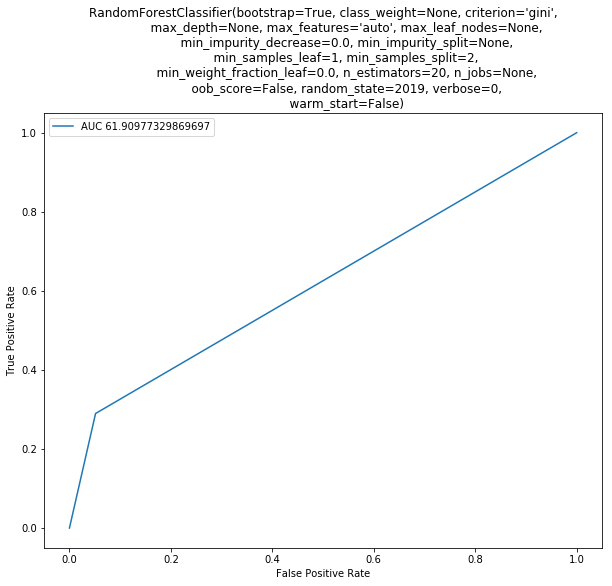

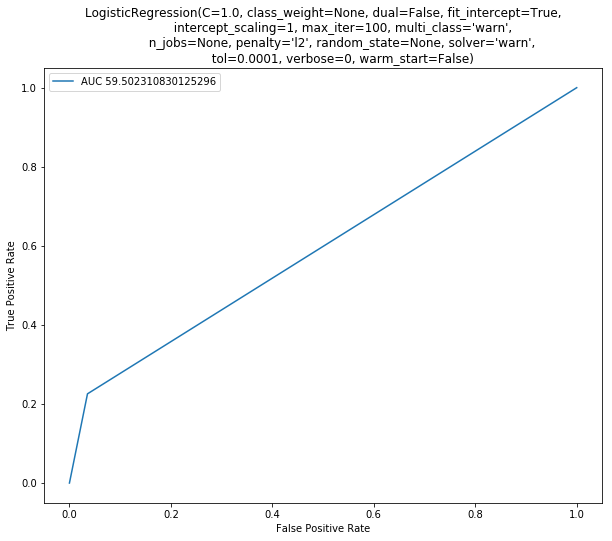

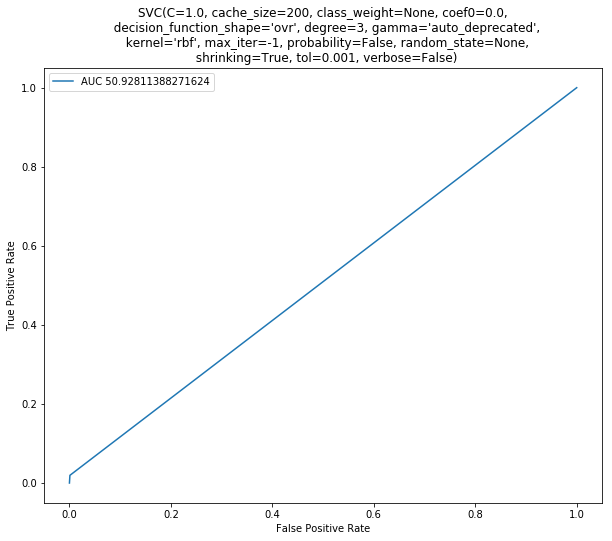

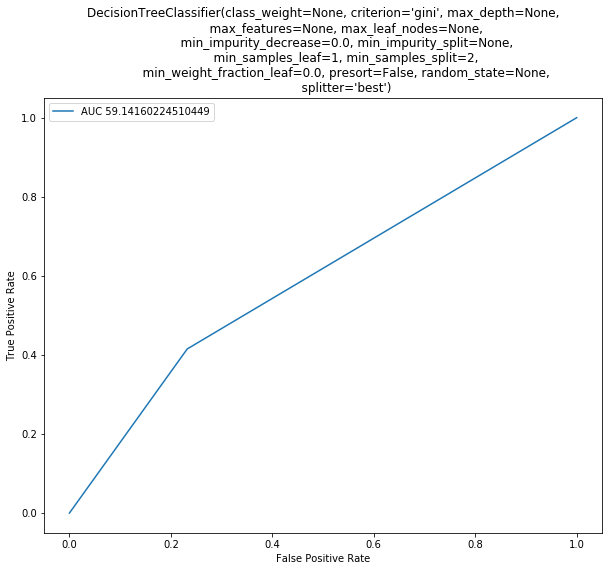

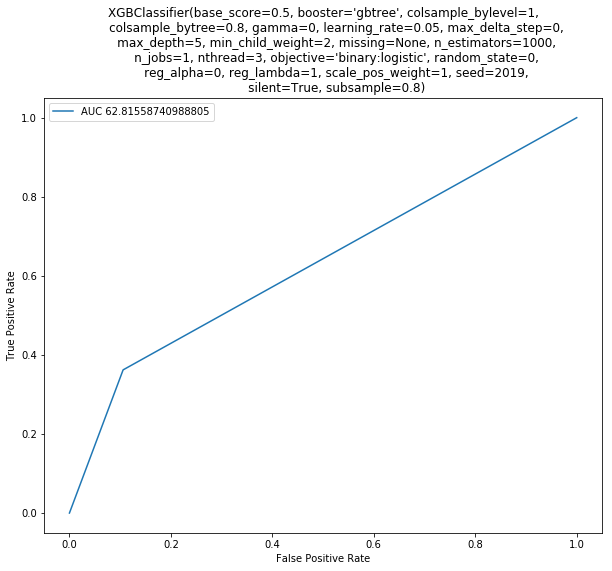

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
for test_model in model_list:
    x_pred = test_model.predict(x_test)
    fpr, tpr, thr = roc_curve(y_test, x_pred)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{}'.format(test_model))
    auc_t = auc(fpr, tpr) * 100
    print('auc',auc_t)
    plt.legend(["AUC {}".format(auc_t)])
plt.show()